<a href="https://colab.research.google.com/github/Muhammadsulton1/MIPT_Data_analys/blob/main/Lesson_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Семинар 11 (неделя 13): Анализ временных рядов
===
Часть 1
=====

In [ ]:
# Импорт библиотек для работы со статистикой
import pandas as pd
import numpy as np
from scipy import stats

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import statsmodels
print(statsmodels.__version__)

0.13.0


In [ ]:
import sktime
print(sktime.__version__)
from sktime.utils.plotting import plot_series

0.8.1


In [ ]:
from sktime.utils.plotting import plot_series

## Визуализация средствами ```pandas```

Рассмотрим датасет, содержащий информацию о ежедневном потреблении и производстве электроэнергии в Германии за период 2006-2017 гг. Описание столбцов:

__Date__ — Дата (формат yyyy-mm-dd)
__Consumption__ — Потребление электроэнергии, ГВтч
__Wind__ — Производство электроэнергии ветряками, ГВтч
__Solar__ — Производство электроэнергии солнечными панелями, ГВтч
__Wind+Solar__ — Суммарное производство электроэнергии ветряками и солнечными панелями, ГВтч


In [ ]:
ENP = pd.read_csv('../Lesson_11/opsd_germany_daily.csv', sep = ',')

ENP

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [ ]:
ENP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
pd.to_datetime('2018-01-15 3:45pm'), pd.to_datetime('7/8/1952')

(Timestamp('2018-01-15 15:45:00'), Timestamp('1952-07-08 00:00:00'))

In [ ]:
ENP['Date'] = pd.to_datetime(ENP['Date'])

In [ ]:
ENP.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [ ]:
ENP

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [ ]:
ENP = ENP.set_index('Date')

In [ ]:
ENP

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [ ]:
ENP.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
ENP.iloc[:100]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...
2006-04-06,1432.853,NaN,NaN,NaN
2006-04-07,1394.980,NaN,NaN,NaN
2006-04-08,1195.959,NaN,NaN,NaN


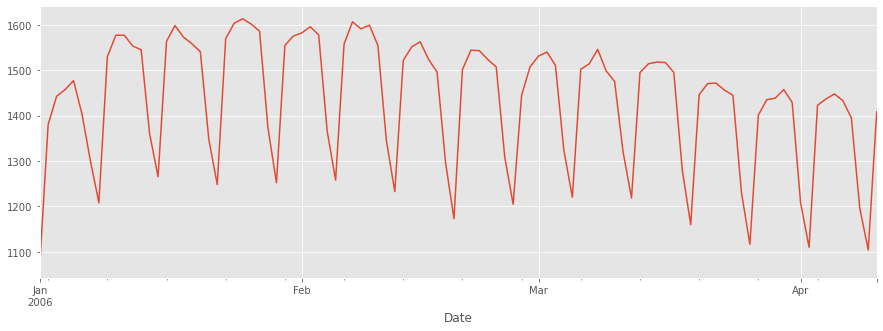

In [ ]:
ENP['Consumption'].iloc[:100].plot(figsize = (15, 5));

In [ ]:
epp = pd.read_csv('../Lesson_11/opsd_germany_daily.csv', index_col=0, parse_dates=True)
epp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [ ]:
epp.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

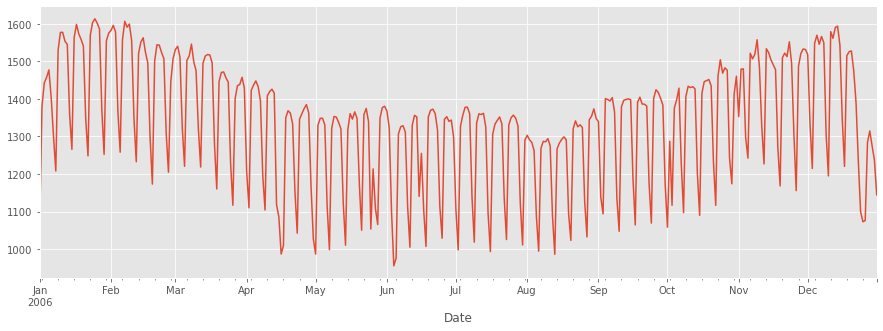

In [ ]:
epp['Consumption'].iloc[:365].plot(figsize = (15, 5));

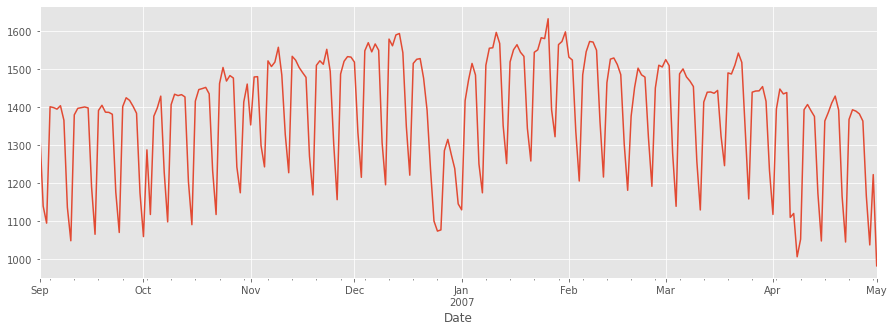

In [ ]:
epp['Consumption'].loc['2006-09-01':'2007-05-01'].plot(figsize = (15, 5));

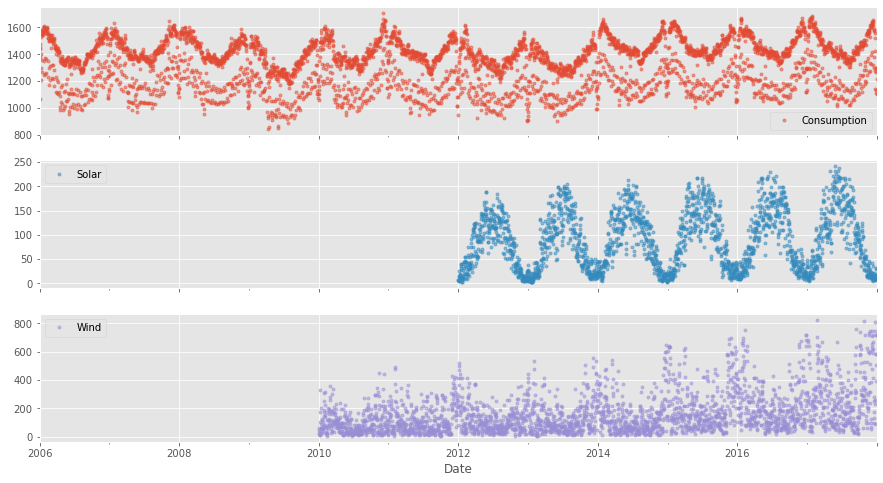

In [ ]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = epp[cols_plot].plot(marker = '.',
                           alpha = 0.5,
                           linestyle = 'None',
                           figsize = (15, 8),
                           subplots = True
                          );

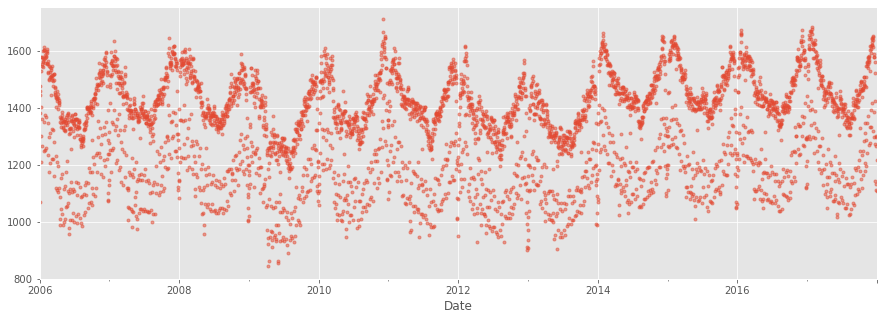

In [ ]:
epp['Consumption'].plot(marker = '.',
                        alpha = 0.5,
                        linestyle = 'None',
                        figsize = (15, 5),
                        subplots = True
                       );

In [ ]:
epp['Month'] = epp.index.month
epp

,Consumption,Wind,Solar,Wind+Solar,Month
Date,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1
2006-01-02,1380.52100,NaN,NaN,NaN,1
2006-01-03,1442.53300,NaN,NaN,NaN,1
2006-01-04,1457.21700,NaN,NaN,NaN,1
2006-01-05,1477.13100,NaN,NaN,NaN,1
...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12
2017-12-28,1299.86398,506.424,14.162,520.586,12
2017-12-29,1295.08753,584.277,29.854,614.131,12


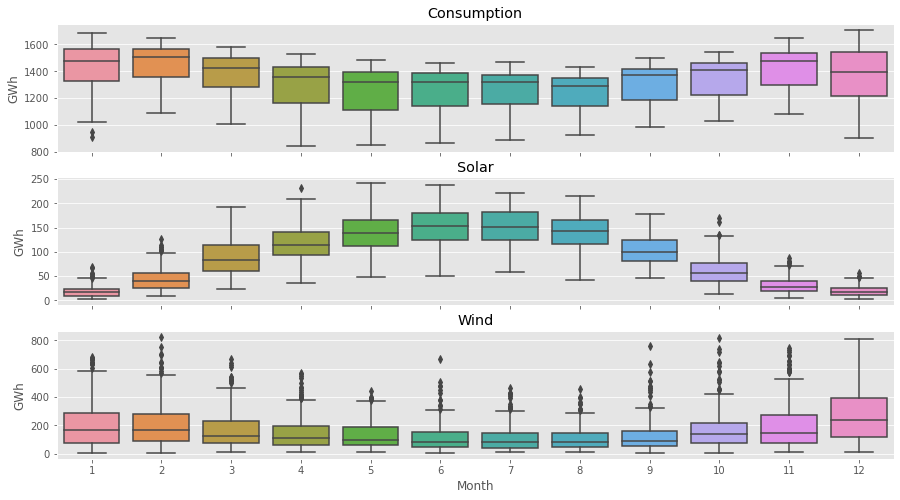

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 8), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=epp, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

In [ ]:
epp['Weekday'] = epp.index.weekday

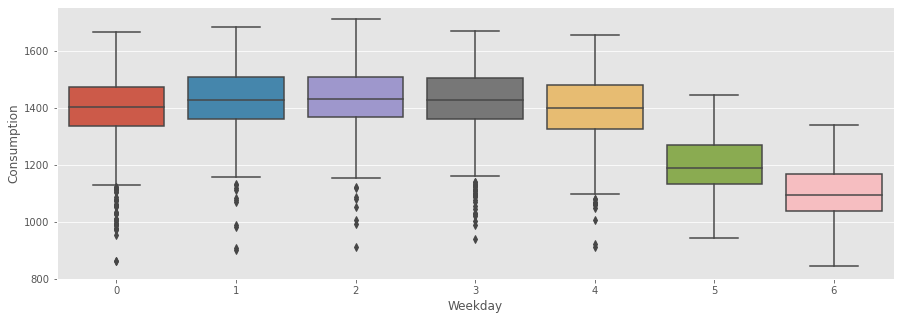

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = epp, x = 'Weekday', y = 'Consumption');

In [ ]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
epp_weekly_mean = epp[data_columns].resample('W').mean()
epp_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


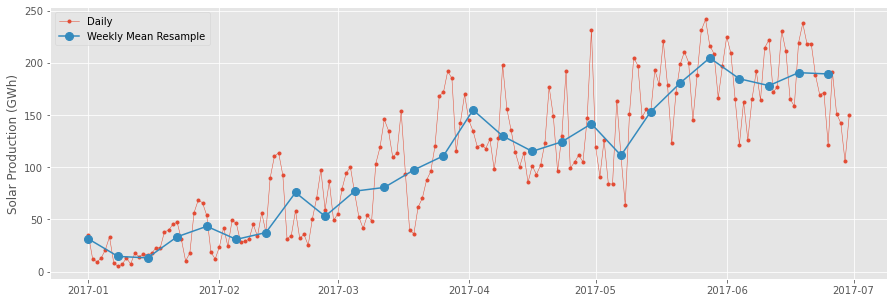

In [ ]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(epp.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(epp_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [ ]:
# Compute the centered 7-day rolling mean
epp_7d = epp[data_columns].rolling(7, center=True).mean()
epp_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


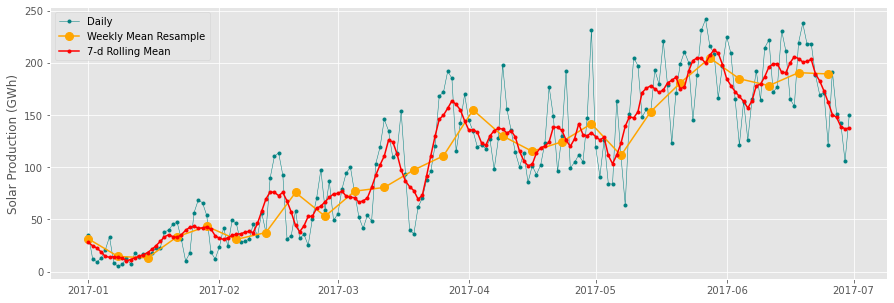

In [ ]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(epp.loc[start:end, 'Solar'],
marker='.', linestyle='-', color = 'teal', linewidth=0.5, label='Daily')

ax.plot(epp_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, color = 'orange', linestyle='-', label='Weekly Mean Resample')

ax.plot(epp_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', color = 'red', label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [ ]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
epp_365d = epp[data_columns].rolling(window=365, center=True, min_periods=360).mean()

In [ ]:
import matplotlib.dates as mdates

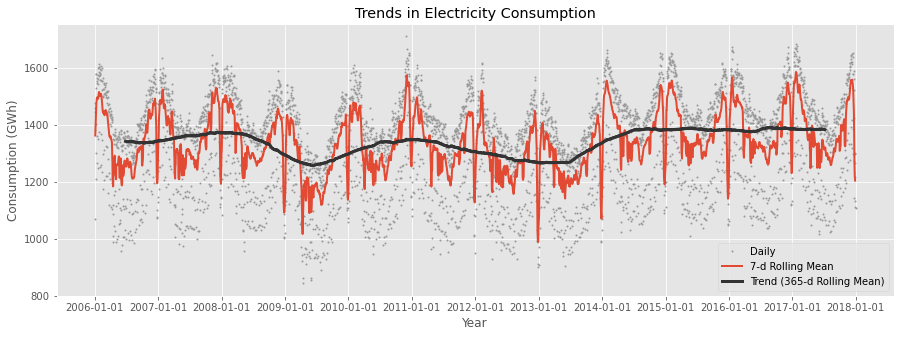

In [ ]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(epp['Consumption'],
        marker='.',
        markersize=2,
        color='0.6',
        linestyle='None',
        label='Daily'
       )

ax.plot(epp_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(epp_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

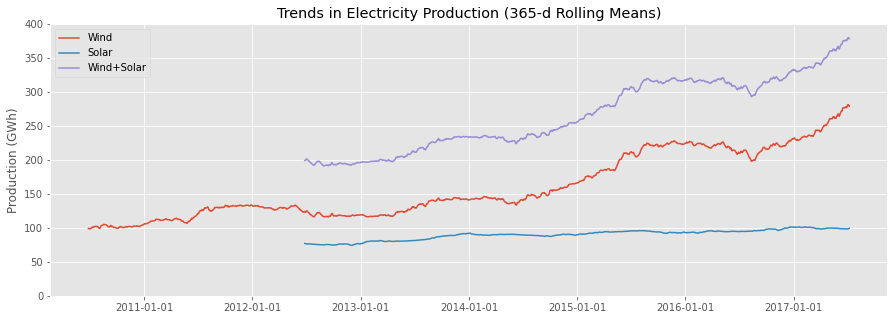

In [ ]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots(figsize=(15, 5))
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(epp_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

---
---
## Прогнозирование временных рядов


Метрика качества прогноза:
Mean Absolute Percentage Error, как MAE, только в процентах, - удобно для объяснения заказчику качества прогноза

$$
MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}
$$

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
ENP = pd.read_csv('../Lesson_11/opsd_germany_daily.csv',
                  index_col = 0,
                  parse_dates = True
                 ).asfreq('D')
ENP.info()

NameError: ignored

In [ ]:
ENP.index

In [ ]:
# Используем пакет sktime.plot_series
# pip3 install sktime
# conda install -c conda-forge sktime

plt.figure(figsize=(15, 6))

plot_series(ENP['Consumption'])

plt.title('Потребление электроэнергии (ГВатт*час)', fontsize=20, color='black')

plt.tick_params(axis = 'x', labelrotation = 90);

In [ ]:
y = ENP['Consumption'].loc['2015-05-01':'2015-08-30']

In [ ]:
# Разбиение данных на обучение и контроль.

from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size = 29)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [ ]:
# Чтобы прогнозы корректно индексировались, заведём отдельную переменную с индексами-датами.

from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(y_test.index, is_relative = False)
fh

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Можно построить наивный прогноз с помощью разных стратегий.
# Например, как среднее за последние window_length наблюдений.

from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="mean", window_length=28)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
mape(y_pred, y_test)

In [ ]:
# Можно с помощью сезонного последнего значения.

forecaster = NaiveForecaster(strategy="last", sp = 7)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
mape(y_pred, y_test)

## ETS - модели
ETS(ANN)


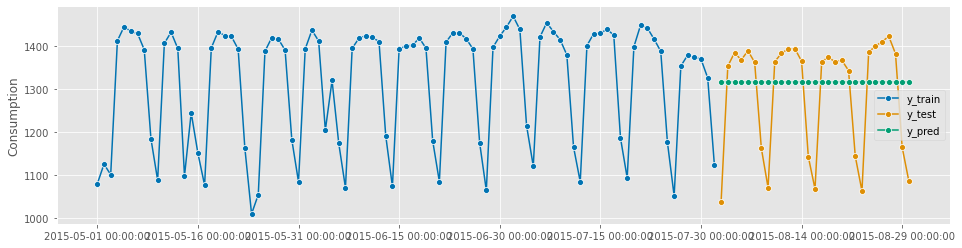

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

# ETS(ANN)   старое название: Simple exponential smoothing
forecaster = ExponentialSmoothing()
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
mape(y_test, y_pred)

9.137769672471876

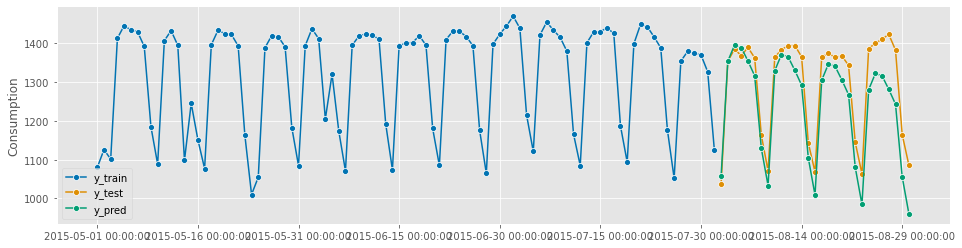

In [ ]:
#ETS(AAA)
# ETS(ANN)   старое название: Simple exponential smoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="add", sp = 7)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
mape(y_test, y_pred)

4.596204514958495

Auto-ETS
Можно перебрать все ETS модели и выбрать лучшую по какому-то критерию.

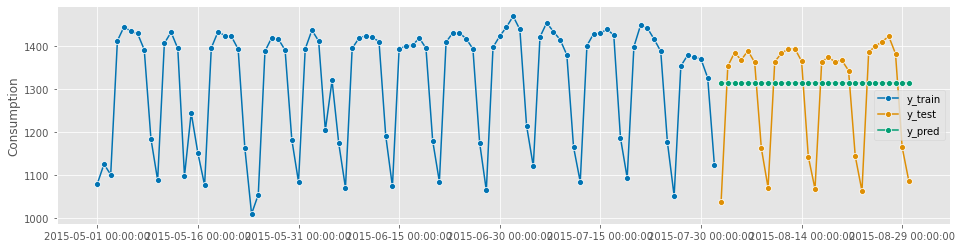

In [ ]:
from sktime.forecasting.ets import AutoETS

# Делаем перебор и выбираем лучшую модель по информационному критерию
forecaster = AutoETS(auto=True, n_jobs=-1, information_criterion='bic')
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
mape(y_test, y_pred)

9.194486446754265

### Доверительные интервалы

К сожалению, в рамках sktime доверительные интервалы для ETS-моделей ещё не реализованы. Вы можете помочь развитию пакета и реализовать их самостоятельно! :)

Сейчас ETS-модель опирается в этом пакете на модуль exponential_smoothing из пакета statsmodels. В нём доверительные интервалы не предусмотрены. В этом же пакете есть модуль statespace. Там доверительные интервалы уже есть.

In [ ]:
import statsmodels.api as sm

ets_aaa = sm.tsa.statespace.ExponentialSmoothing(y_train, trend=True, seasonal = 7)
ets_aaa_res = ets_aaa.fit()
print(ets_aaa_res.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01898D+00    |proj g|=  5.60331D-02

At iterate    5    f=  6.24051D+00    |proj g|=  2.66236D-03

At iterate   10    f=  6.12753D+00    |proj g|=  7.85363D-03

At iterate   15    f=  6.09645D+00    |proj g|=  5.42574D-03

At iterate   20    f=  5.77443D+00    |proj g|=  1.40077D-02

At iterate   25    f=  5.63402D+00    |proj g|=  4.18529D-02

At iterate   30    f=  5.62541D+00    |proj g|=  2.20609D-03

At iterate   35    f=  5.60083D+00    |proj g|=  1.00166D-01

At iterate   40    f=  5.56889D+00    |proj g|=  1.26695D-03

At iterate   45    f=  5.56706D+00    |proj g|=  1.82277D-02

At iterate   50    f=  5.56260D+00    |proj g|=  2.15737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [ ]:
h = 29 # test_size
df_forecast = ets_aaa_res.get_forecast(h).summary_frame()
df_forecast.index = fh
df_forecast.head()

Consumption,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-08-02,1105.610585,63.033310,982.067568,1229.153603
2015-08-03,1400.524664,63.033311,1276.981644,1524.067684
2015-08-04,1454.504149,63.033314,1330.961124,1578.047175
2015-08-05,1450.078079,63.033319,1326.535044,1573.621115
2015-08-06,1408.216419,63.033327,1284.673368,1531.759470


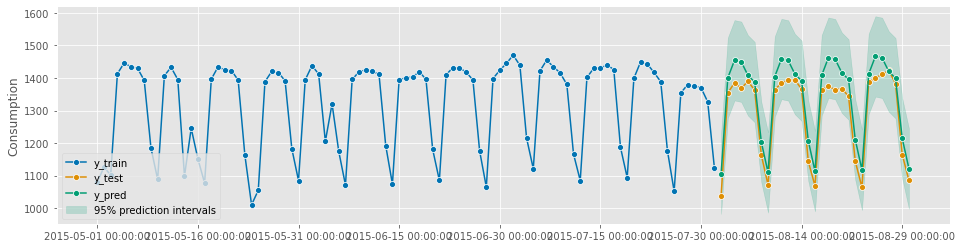

In [ ]:
fig, ax = plot_series(y_train, y_test, df_forecast['mean'], labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    df_forecast["mean_ci_lower"],
    df_forecast["mean_ci_upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='lower left');

In [ ]:
mape(y_test, df_forecast['mean'])

3.8098079321142646

### Диагностика модели

Чтобы доверительный интервалы были корректными, надо чтобы выполнялись предпосылки модели. Ошибки должны быть независимо нормально распределены с нулевым средним и одинаковой дисперсией. Давайте посмотрим на них.

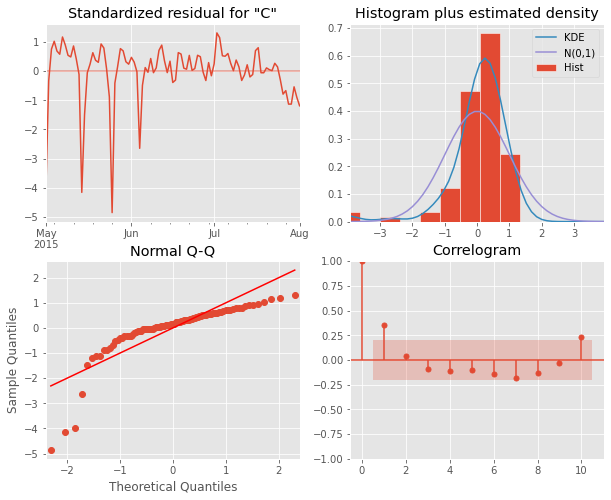

In [ ]:
ets_aaa_res.plot_diagnostics(figsize=(10, 8));

## Кросс-валидация

Выше мы оценивали модель на тренировочном периоде, а дальше строили прогноз на весь тестовый. Дальше мы считали ошибку. Это не очень корректно, так как строить прогноз на неделю вперёд сложнее, чем на сутки вперёд.

Гораздо корректнее сделать кросс-валидацию со скользящим окном и сравнить модели между собой на разных горизонтах прогнозирования.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
y = ENP['Consumption'].loc['2015-05-03':'2015-08-30']

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Consumption'>)

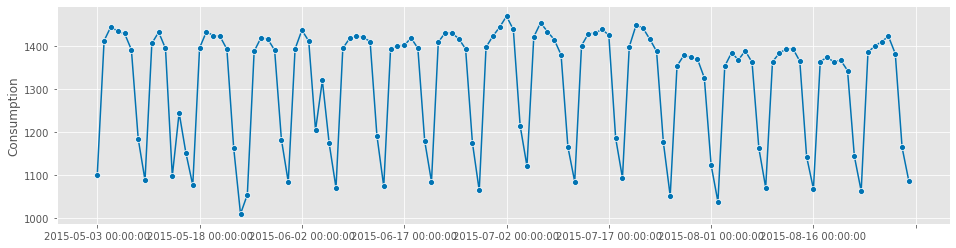

In [ ]:
plot_series(y)

Поэлементную кросс-валидацию (Leave-One-Out, LOO) можно сделать с помощью оконных функций в pandas.

In [ ]:
def timeseries_cv(y, metric = mape, treshhold = 0.8):

    # последний день всегда в тестовой выборке
    y_train = y[:-1].values
    y_test = y[-1:].values

    # на каждой выборке обучаем модель
    model = sm.tsa.statespace.ExponentialSmoothing(y_train, trend = True, seasonal = 7)
    res = model.fit()

    # делаем прогноз и находим качество прогноза
    y_hat = res.get_forecast(1).summary_frame()['mean']
    return metric(y_test, y_hat)

In [ ]:
# Функция прогнозирует на день вперёд и вычисляет ошибку.

timeseries_cv(y)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73802D+00    |proj g|=  7.55900D-02

At iterate    5    f=  5.58733D+00    |proj g|=  1.22524D-01

At iterate   10    f=  5.54095D+00    |proj g|=  1.03885D-02


 This problem is unconstrained.



At iterate   15    f=  5.53040D+00    |proj g|=  3.36165D-02

At iterate   20    f=  5.52414D+00    |proj g|=  1.14333D-03

At iterate   25    f=  5.49858D+00    |proj g|=  1.81619D-02

At iterate   30    f=  5.47031D+00    |proj g|=  2.93410D-03

At iterate   35    f=  5.46566D+00    |proj g|=  2.92036D-02

At iterate   40    f=  5.46240D+00    |proj g|=  1.91833D-02

At iterate   45    f=  5.38984D+00    |proj g|=  6.31800D-03

At iterate   50    f=  5.38175D+00    |proj g|=  7.09844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   7.098D-03   5.382D+00
  F =   5.38174580519

In [ ]:
# Воспользуемся методами expanding и rolling.

min_period = int(0.8*y.size)

In [ ]:
# расширяющееся окно

quality = y.expanding(min_period).apply(lambda x: timeseries_cv(x))
quality.dropna().mean()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.80638D+00    |proj g|=  7.38563D-02

At iterate    5    f=  5.63129D+00    |proj g|=  1.59515D-02

At iterate   10    f=  5.61743D+00    |proj g|=  9.41943D-03


 This problem is unconstrained.



At iterate   15    f=  5.60781D+00    |proj g|=  6.03345D-03

At iterate   20    f=  5.56231D+00    |proj g|=  6.25047D-02

At iterate   25    f=  5.55153D+00    |proj g|=  2.99530D-03

At iterate   30    f=  5.53021D+00    |proj g|=  2.46309D-02

At iterate   35    f=  5.47326D+00    |proj g|=  3.33381D-02

At iterate   40    f=  5.46714D+00    |proj g|=  1.92604D-02

At iterate   45    f=  5.44742D+00    |proj g|=  7.06699D-03

At iterate   50    f=  5.44661D+00    |proj g|=  2.41471D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.415D-04   5.447D+00
  F =   5.44660748411

 This problem is unconstrained.



At iterate    5    f=  5.62803D+00    |proj g|=  8.67765D-03

At iterate   10    f=  5.61173D+00    |proj g|=  6.92579D-03

At iterate   15    f=  5.60318D+00    |proj g|=  7.05391D-03

At iterate   20    f=  5.54957D+00    |proj g|=  3.93643D-03

At iterate   25    f=  5.54445D+00    |proj g|=  5.01294D-03

At iterate   30    f=  5.49289D+00    |proj g|=  4.70586D-02

At iterate   35    f=  5.46902D+00    |proj g|=  7.47194D-03

At iterate   40    f=  5.45653D+00    |proj g|=  5.57638D-03

At iterate   45    f=  5.44558D+00    |proj g|=  2.08580D-04

At iterate   50    f=  5.44543D+00    |proj g|=  4.80998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.60297D+00    |proj g|=  1.97203D-03

At iterate   15    f=  5.55629D+00    |proj g|=  4.42529D-02

At iterate   20    f=  5.53852D+00    |proj g|=  1.17717D-03

At iterate   25    f=  5.51062D+00    |proj g|=  2.20825D-02

At iterate   30    f=  5.46479D+00    |proj g|=  5.50069D-03

At iterate   35    f=  5.44381D+00    |proj g|=  1.05111D-02

At iterate   40    f=  5.44203D+00    |proj g|=  2.34955D-04

At iterate   45    f=  5.44191D+00    |proj g|=  2.92847D-03

At iterate   50    f=  5.44172D+00    |proj g|=  1.52168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59   

 This problem is unconstrained.



At iterate    5    f=  5.62668D+00    |proj g|=  1.53123D-02

At iterate   10    f=  5.61679D+00    |proj g|=  2.27621D-02

At iterate   15    f=  5.60059D+00    |proj g|=  2.80584D-03

At iterate   20    f=  5.55760D+00    |proj g|=  3.30245D-02

At iterate   25    f=  5.53799D+00    |proj g|=  3.04631D-03

At iterate   30    f=  5.53594D+00    |proj g|=  3.61695D-03

At iterate   35    f=  5.52887D+00    |proj g|=  8.90892D-03

At iterate   40    f=  5.46250D+00    |proj g|=  5.27300D-03

At iterate   45    f=  5.44466D+00    |proj g|=  6.57150D-03

At iterate   50    f=  5.44058D+00    |proj g|=  4.80867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62359D+00    |proj g|=  4.68930D-03

At iterate   10    f=  5.60851D+00    |proj g|=  1.69872D-02

At iterate   15    f=  5.59738D+00    |proj g|=  5.12702D-03

At iterate   20    f=  5.56645D+00    |proj g|=  5.45648D-03

At iterate   25    f=  5.54429D+00    |proj g|=  1.48135D-02

At iterate   30    f=  5.53823D+00    |proj g|=  2.01712D-02

At iterate   35    f=  5.46598D+00    |proj g|=  1.45157D-02

At iterate   40    f=  5.45214D+00    |proj g|=  1.18958D-03

At iterate   45    f=  5.43730D+00    |proj g|=  1.47600D-04

At iterate   50    f=  5.43711D+00    |proj g|=  1.39065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79461D+00    |proj g|=  6.86833D-02

At iterate    5    f=  5.62065D+00    |proj g|=  4.81035D-03

At iterate   10    f=  5.61208D+00    |proj g|=  1.87137D-02

At iterate   15    f=  5.59327D+00    |proj g|=  3.27356D-03

At iterate   20    f=  5.53593D+00    |proj g|=  3.79103D-03

At iterate   25    f=  5.53286D+00    |proj g|=  1.48998D-02

At iterate   30    f=  5.45709D+00    |proj g|=  1.69605D-03

At iterate   35    f=  5.43661D+00    |proj g|=  6.69608D-03

At iterate   40    f=  5.43541D+00    |proj g|=  9.90432D-05

At iterate   45    f=  5.43535D+00    |proj g|=  4.08763D-03

At iterate   50    f=  5.43528D+00    |proj g|=  3.05531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.59131D+00    |proj g|=  1.19175D-03

At iterate   20    f=  5.53177D+00    |proj g|=  3.35450D-03

At iterate   25    f=  5.51130D+00    |proj g|=  5.13789D-02

At iterate   30    f=  5.45591D+00    |proj g|=  4.56949D-03

At iterate   35    f=  5.44782D+00    |proj g|=  9.58983D-03

At iterate   40    f=  5.44201D+00    |proj g|=  1.21405D-02

At iterate   45    f=  5.43226D+00    |proj g|=  7.33135D-03

At iterate   50    f=  5.43107D+00    |proj g|=  2.78812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     64      1     0     0   2.788D-03   5.431D+00
  F =   5.43107220656

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78531D+00    |proj g|=  6.89911D-02

At iterate    5    f=  5.61267D+00    |proj g|=  1.66170D-02

At iterate   10    f=  5.60288D+00    |proj g|=  1.53121D-02

At iterate   15    f=  5.58910D+00    |proj g|=  1.01141D-02

At iterate   20    f=  5.58597D+00    |proj g|=  8.78430D-03

At iterate   25    f=  5.54202D+00    |proj g|=  1.81536D-02

At iterate   30    f=  5.52732D+00    |proj g|=  7.67259D-03

At iterate   35    f=  5.52588D+00    |proj g|=  1.83213D-03

At iterate   40    f=  5.52012D+00    |proj g|=  3.61320D-02

At iterate   45    f=  5.44461D+00    |proj g|=  3.90731D-03

At iterate   50    f=  5.43797D+00    |proj g|=  9.49521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 This problem is unconstrained.



At iterate    5    f=  5.61120D+00    |proj g|=  2.82426D-02

At iterate   10    f=  5.60475D+00    |proj g|=  1.21731D-02

At iterate   15    f=  5.58693D+00    |proj g|=  1.50027D-02

At iterate   20    f=  5.58445D+00    |proj g|=  7.35069D-03

At iterate   25    f=  5.54922D+00    |proj g|=  4.85427D-02

At iterate   30    f=  5.53240D+00    |proj g|=  3.70209D-02

At iterate   35    f=  5.52394D+00    |proj g|=  1.03192D-03

At iterate   40    f=  5.47331D+00    |proj g|=  8.21833D-02

At iterate   45    f=  5.44868D+00    |proj g|=  1.79237D-03

At iterate   50    f=  5.44143D+00    |proj g|=  1.10968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.58139D+00    |proj g|=  1.19436D-03

At iterate   20    f=  5.57948D+00    |proj g|=  1.18246D-02

At iterate   25    f=  5.56445D+00    |proj g|=  1.75525D-02

At iterate   30    f=  5.53912D+00    |proj g|=  7.92433D-03

At iterate   35    f=  5.50073D+00    |proj g|=  3.38665D-03

At iterate   40    f=  5.47218D+00    |proj g|=  1.60682D-02

At iterate   45    f=  5.42694D+00    |proj g|=  1.77782D-02

At iterate   50    f=  5.41206D+00    |proj g|=  2.03810D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     74      1     0     0   2.038D-03   5.412D+00
  F =   5.41206331056

 This problem is unconstrained.



At iterate   10    f=  5.58021D+00    |proj g|=  2.58905D-02

At iterate   15    f=  5.56560D+00    |proj g|=  1.15034D-02

At iterate   20    f=  5.52050D+00    |proj g|=  5.24492D-03

At iterate   25    f=  5.51590D+00    |proj g|=  1.39384D-02

At iterate   30    f=  5.44625D+00    |proj g|=  9.93783D-03

At iterate   35    f=  5.44205D+00    |proj g|=  1.38235D-02

At iterate   40    f=  5.42402D+00    |proj g|=  1.24441D-02

At iterate   45    f=  5.42365D+00    |proj g|=  9.50242D-05

At iterate   50    f=  5.42343D+00    |proj g|=  8.19141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61   

 This problem is unconstrained.



At iterate   15    f=  5.57589D+00    |proj g|=  1.66836D-02

At iterate   20    f=  5.57033D+00    |proj g|=  3.19055D-02

At iterate   25    f=  5.52728D+00    |proj g|=  3.16917D-02

At iterate   30    f=  5.52044D+00    |proj g|=  3.95989D-03

At iterate   35    f=  5.49186D+00    |proj g|=  1.25542D-01

At iterate   40    f=  5.42785D+00    |proj g|=  1.85950D-03

At iterate   45    f=  5.42198D+00    |proj g|=  9.70250D-04

At iterate   50    f=  5.42183D+00    |proj g|=  2.43386D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62      1     0     0   2.434D-03   5.422D+00
  F =   5.42183235853

 This problem is unconstrained.



At iterate   10    f=  5.57987D+00    |proj g|=  3.47624D-02

At iterate   15    f=  5.57160D+00    |proj g|=  1.17610D-03

At iterate   20    f=  5.56741D+00    |proj g|=  3.35384D-02

At iterate   25    f=  5.52955D+00    |proj g|=  4.75158D-03

At iterate   30    f=  5.49821D+00    |proj g|=  8.36744D-03

At iterate   35    f=  5.48844D+00    |proj g|=  4.23432D-03

At iterate   40    f=  5.41005D+00    |proj g|=  6.68219D-03

At iterate   45    f=  5.39903D+00    |proj g|=  5.35576D-04

At iterate   50    f=  5.39606D+00    |proj g|=  1.60915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62   

 This problem is unconstrained.



At iterate   10    f=  5.58535D+00    |proj g|=  7.57512D-03

At iterate   15    f=  5.56953D+00    |proj g|=  2.81552D-02

At iterate   20    f=  5.56267D+00    |proj g|=  3.23547D-02

At iterate   25    f=  5.52129D+00    |proj g|=  1.42101D-02

At iterate   30    f=  5.49894D+00    |proj g|=  1.37907D-02

At iterate   35    f=  5.48606D+00    |proj g|=  2.33701D-03

At iterate   40    f=  5.41838D+00    |proj g|=  1.34545D-02

At iterate   45    f=  5.40028D+00    |proj g|=  3.04169D-03

At iterate   50    f=  5.39411D+00    |proj g|=  1.26797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     66   

 This problem is unconstrained.



At iterate   15    f=  5.56271D+00    |proj g|=  1.15659D-03

At iterate   20    f=  5.54050D+00    |proj g|=  6.89249D-02

At iterate   25    f=  5.50612D+00    |proj g|=  2.43949D-03

At iterate   30    f=  5.49770D+00    |proj g|=  2.46534D-03

At iterate   35    f=  5.44772D+00    |proj g|=  6.05085D-03

At iterate   40    f=  5.43054D+00    |proj g|=  1.26477D-02

At iterate   45    f=  5.41299D+00    |proj g|=  4.93529D-03

At iterate   50    f=  5.41086D+00    |proj g|=  1.07137D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     63      1     0     0   1.071D-04   5.411D+00
  F =   5.41086387473

 This problem is unconstrained.



At iterate   15    f=  5.55836D+00    |proj g|=  1.69252D-03

At iterate   20    f=  5.52661D+00    |proj g|=  4.70006D-02

At iterate   25    f=  5.50130D+00    |proj g|=  1.30861D-03

At iterate   30    f=  5.44591D+00    |proj g|=  1.27378D-02

At iterate   35    f=  5.42423D+00    |proj g|=  2.38852D-03

At iterate   40    f=  5.40764D+00    |proj g|=  3.39876D-03

At iterate   45    f=  5.40752D+00    |proj g|=  2.13491D-03

At iterate   50    f=  5.40707D+00    |proj g|=  2.09340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     64      1     0     0   2.093D-03   5.407D+00
  F =   5.40706588514

 This problem is unconstrained.



At iterate    5    f=  5.58056D+00    |proj g|=  3.38924D-02

At iterate   10    f=  5.57260D+00    |proj g|=  1.55235D-02

At iterate   15    f=  5.55387D+00    |proj g|=  1.64250D-03

At iterate   20    f=  5.54648D+00    |proj g|=  2.30960D-02

At iterate   25    f=  5.50945D+00    |proj g|=  2.17166D-02

At iterate   30    f=  5.49584D+00    |proj g|=  2.50142D-03

At iterate   35    f=  5.49056D+00    |proj g|=  1.54273D-02

At iterate   40    f=  5.43683D+00    |proj g|=  3.74623D-03

At iterate   45    f=  5.42136D+00    |proj g|=  3.98737D-03

At iterate   50    f=  5.40385D+00    |proj g|=  2.10978D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75545D+00    |proj g|=  7.01019D-02

At iterate    5    f=  5.58145D+00    |proj g|=  6.14089D-02

At iterate   10    f=  5.56816D+00    |proj g|=  1.58369D-02

At iterate   15    f=  5.55059D+00    |proj g|=  1.54909D-02

At iterate   20    f=  5.54915D+00    |proj g|=  1.09805D-02

At iterate   25    f=  5.50805D+00    |proj g|=  4.96633D-02

At iterate   30    f=  5.47990D+00    |proj g|=  1.23265D-02

At iterate   35    f=  5.46796D+00    |proj g|=  3.48044D-03

At iterate   40    f=  5.39277D+00    |proj g|=  1.47239D-02

At iterate   45    f=  5.38204D+00    |proj g|=  1.28816D-03

At iterate   50    f=  5.37635D+00    |proj g|=  1.83681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  5.56461D+00    |proj g|=  9.40890D-03

At iterate   15    f=  5.54573D+00    |proj g|=  4.58383D-03

At iterate   20    f=  5.54251D+00    |proj g|=  1.22244D-02

At iterate   25    f=  5.49325D+00    |proj g|=  7.68326D-03

At iterate   30    f=  5.48877D+00    |proj g|=  8.15326D-03

At iterate   35    f=  5.46498D+00    |proj g|=  1.01382D-01

At iterate   40    f=  5.41885D+00    |proj g|=  9.99926D-03

At iterate   45    f=  5.41265D+00    |proj g|=  9.82448D-03

At iterate   50    f=  5.40368D+00    |proj g|=  1.29828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     66   

 This problem is unconstrained.



At iterate    5    f=  5.60296D+00    |proj g|=  1.03301D-01

At iterate   10    f=  5.56096D+00    |proj g|=  9.84491D-03

At iterate   15    f=  5.54529D+00    |proj g|=  8.69622D-03

At iterate   20    f=  5.52534D+00    |proj g|=  2.67328D-02

At iterate   25    f=  5.48707D+00    |proj g|=  2.62166D-03

At iterate   30    f=  5.43743D+00    |proj g|=  5.33173D-02

At iterate   35    f=  5.41425D+00    |proj g|=  1.25803D-03

At iterate   40    f=  5.39852D+00    |proj g|=  1.46997D-02

At iterate   45    f=  5.39499D+00    |proj g|=  8.45431D-03

At iterate   50    f=  5.39427D+00    |proj g|=  1.00888D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.60111D+00    |proj g|=  1.03674D-01

At iterate   10    f=  5.55657D+00    |proj g|=  9.87555D-03

At iterate   15    f=  5.54148D+00    |proj g|=  1.42393D-02

At iterate   20    f=  5.53799D+00    |proj g|=  3.34482D-03

At iterate   25    f=  5.50902D+00    |proj g|=  3.92146D-02

At iterate   30    f=  5.49008D+00    |proj g|=  2.10478D-02

At iterate   35    f=  5.48217D+00    |proj g|=  9.50227D-04

At iterate   40    f=  5.47624D+00    |proj g|=  1.77287D-02

At iterate   45    f=  5.41995D+00    |proj g|=  4.96582D-02

At iterate   50    f=  5.40326D+00    |proj g|=  4.05820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.53852D+00    |proj g|=  2.12098D-02

At iterate   20    f=  5.53439D+00    |proj g|=  3.29797D-03

At iterate   25    f=  5.50436D+00    |proj g|=  2.43395D-02

At iterate   30    f=  5.48722D+00    |proj g|=  1.48804D-02

At iterate   35    f=  5.47495D+00    |proj g|=  2.47333D-03

At iterate   40    f=  5.41376D+00    |proj g|=  1.30053D-02

At iterate   45    f=  5.39940D+00    |proj g|=  5.10806D-03

At iterate   50    f=  5.39214D+00    |proj g|=  2.31811D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     66      1     0     0   2.318D-02   5.392D+00
  F =   5.39214193041

 This problem is unconstrained.



At iterate   15    f=  5.53768D+00    |proj g|=  2.73202D-03

At iterate   20    f=  5.53236D+00    |proj g|=  3.31480D-03

At iterate   25    f=  5.52774D+00    |proj g|=  1.91128D-02

At iterate   30    f=  5.50824D+00    |proj g|=  5.14296D-02

At iterate   35    f=  5.47029D+00    |proj g|=  1.35782D-02

At iterate   40    f=  5.45417D+00    |proj g|=  6.30096D-03

At iterate   45    f=  5.38218D+00    |proj g|=  5.57540D-03

At iterate   50    f=  5.37084D+00    |proj g|=  1.65070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     67      1     0     0   1.651D-03   5.371D+00
  F =   5.37083616570

 This problem is unconstrained.



At iterate   15    f=  5.53312D+00    |proj g|=  1.80274D-02

At iterate   20    f=  5.52820D+00    |proj g|=  1.56069D-03

At iterate   25    f=  5.52046D+00    |proj g|=  1.07901D-02

At iterate   30    f=  5.48086D+00    |proj g|=  1.33429D-02

At iterate   35    f=  5.46544D+00    |proj g|=  1.21134D-02

At iterate   40    f=  5.44761D+00    |proj g|=  2.31298D-03

At iterate   45    f=  5.37253D+00    |proj g|=  5.82691D-03

At iterate   50    f=  5.36132D+00    |proj g|=  1.02439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     67      1     0     0   1.024D-03   5.361D+00
  F =   5.36131979745

 This problem is unconstrained.



At iterate   15    f=  5.53040D+00    |proj g|=  3.36165D-02

At iterate   20    f=  5.52414D+00    |proj g|=  1.14333D-03

At iterate   25    f=  5.49858D+00    |proj g|=  1.81619D-02

At iterate   30    f=  5.47031D+00    |proj g|=  2.93410D-03

At iterate   35    f=  5.46566D+00    |proj g|=  2.92036D-02

At iterate   40    f=  5.46240D+00    |proj g|=  1.91833D-02

At iterate   45    f=  5.38984D+00    |proj g|=  6.31800D-03

At iterate   50    f=  5.38175D+00    |proj g|=  7.09844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   7.098D-03   5.382D+00
  F =   5.38174580519

2.1897659474931617

In [ ]:
quality.dropna()

2015-08-06    3.880893
2015-08-07    2.986184
2015-08-08    3.714950
2015-08-09    5.085703
2015-08-10    4.029941
2015-08-11    0.182831
2015-08-12    1.635517
2015-08-13    0.095152
2015-08-14    0.081355
2015-08-15    2.050317
2015-08-16    0.624278
2015-08-17    0.217113
2015-08-18    0.651027
2015-08-19    2.055904
2015-08-20    0.564439
2015-08-21    1.463683
2015-08-22    0.032634
2015-08-23    0.643342
2015-08-24    5.638381
2015-08-25    1.681792
2015-08-26    3.170926
2015-08-27    3.710052
2015-08-28    2.653469
2015-08-29    1.812868
2015-08-30    2.149869
Freq: D, Name: Consumption, dtype: float64

In [ ]:
quality.dropna().mean()

2.0325048277410365